# Testing surprise lib recomenders

# Setup

In [2]:
!pip install surprise==0.1

    100% |████████████████████████████████| 3.3MB 193kB/s eta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go.

# Import

In [1]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

# Data

In [4]:
dataSet = Dataset.load_builtin('ml-100k')

Total entries:
100000

Ratings count:
1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64


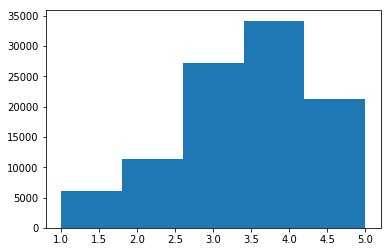

In [33]:
# Get raw data from the dataset.
rawData = pd.read_table(dataSet.ratings_file, names=['user', 'item', 'rating', 'timestamp'])

# Extract ratings.
ratings = rawData.rating

# Show the data with pandas' tools.
print("Total entries:")
print(ratings.count())
print("\nRatings count:")
print(ratings.value_counts().sort_index())
ratings.hist(bins=5, grid=0)

# Model 1: Random

In [34]:
normalModel = NormalPredictor()

In [43]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
cross_validate(normalModel, dataSet, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5343  1.5223  1.5163  1.5223  1.5265  1.5244  0.0060  
Fit time          0.17    0.18    0.16    0.18    0.19    0.18    0.01    
Test time         0.29    0.19    0.17    0.29    0.24    0.24    0.05    


{'test_rmse': array([1.53433907, 1.52228385, 1.51634454, 1.52225897, 1.5265337 ]),
 'fit_time': (0.16830825805664062,
  0.18152475357055664,
  0.1552743911743164,
  0.18437886238098145,
  0.19203639030456543),
 'test_time': (0.29009509086608887,
  0.18946504592895508,
  0.17206120491027832,
  0.29299306869506836,
  0.23724031448364258)}

# Model 2: User-Based Collaborative Filtering

In [44]:
userFilteringModel = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})

In [46]:
cross_validate(userFilteringModel, dataSet, measures=['RMSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0193  1.0187  1.0125  1.0110  1.0227  1.0168  0.0044  
Fit time          1.30    1.32    1.45    1.24    1.34    1.33    0.07    
Test time         5.06    6.55    5.58    5.22    5.26    5.53    0.54    


{'test_rmse': array([1.0193222 , 1.0187437 , 1.01245071, 1.01101729, 1.02268412]),
 'fit_time': (1.3016605377197266,
  1.3229217529296875,
  1.450211763381958,
  1.2359185218811035,
  1.3403871059417725),
 'test_time': (5.057806968688965,
  6.55403208732605,
  5.579775333404541,
  5.216059923171997,
  5.2554662227630615)}

# Model 3: Item-Based Collaborative Filtering

In [48]:
itemFilteringModel = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})

In [49]:
cross_validate(itemFilteringModel, dataSet, measures=['RMSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0330  1.0229  1.0228  1.0330  1.0203  1.0264  0.0055  
Fit time          6.33    3.58    2.51    3.03    2.82    3.65    1.38    
Test time         5.38    5.94    6.01    5.64    5.90    5.77    0.23    


{'test_rmse': array([1.0329836 , 1.02287555, 1.02279279, 1.03301697, 1.02029478]),
 'fit_time': (6.325323820114136,
  3.5762929916381836,
  2.507969617843628,
  3.0258467197418213,
  2.8205394744873047),
 'test_time': (5.375450611114502,
  5.937932252883911,
  6.008522272109985,
  5.638849258422852,
  5.902042627334595)}

# Model 4: Matrix Factorization

In [50]:
SVDModel = SVD()

In [51]:
cross_validate(SVDModel, dataSet, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9417  0.9397  0.9378  0.9365  0.9347  0.9381  0.0024  
Fit time          7.09    6.33    8.60    7.13    7.56    7.34    0.74    
Test time         0.26    0.33    0.20    0.27    0.21    0.25    0.05    


{'test_rmse': array([0.94173009, 0.93974565, 0.93775881, 0.93653856, 0.93474271]),
 'fit_time': (7.089351177215576,
  6.330826282501221,
  8.602913618087769,
  7.130563497543335,
  7.556233167648315),
 'test_time': (0.2551112174987793,
  0.3333096504211426,
  0.19997525215148926,
  0.26703786849975586,
  0.21363019943237305)}

# Precision and Recall @ `k`

In [52]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [67]:
models = {
    'Normal model': normalModel,
    'User collaborative filtering': userFilteringModel,
    'Item collaborative filtering': itemFilteringModel,
    'Matrix factorization (SVD)': SVDModel
}

kf = KFold(n_splits=5)

for k in [5, 10]:
    for modelLabel, model in models.items():
        print(f'Runing calculation for: k={k} and model={modelLabel}')
        precision = []
        recall = []
        for trainSet, testSet in kf.split(dataSet):
            model.fit(trainSet)
            predictions = model.test(testSet, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)
            precision.append(sum(prec for prec in precisions.values()) / len(precisions))
            recall.append(sum(rec for rec in recalls.values()) / len(recalls))
        avg_precision = sum(precision) / len(precision)
        avg_recall = sum(recall) / len(recall)
        f1_score = 2 * avg_precision * avg_recall / (avg_precision + avg_recall)
        print(' --> Precision: ', avg_precision)
        print(' --> Recall: ', avg_recall)
        print(' --> F1 score: ', f1_score)
        print('\n\n ------------ \n\n')
        

Runing calculation for: k=5 and model=Normal model
 --> Precision:  0.5867919021905001
 --> Recall:  0.338879702687486
 --> F1 score:  0.4296380364393957


 ------------ 


Runing calculation for: k=5 and model=User collaborative filtering
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
 --> Precision:  0.7557938774315661
 --> Recall:  0.45706476145697106
 --> F1 score:  0.5696405784196997


 ------------ 


Runing calculation for: k=5 and model=Item collaborative filtering
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matri

Precision and recall are different from the RMSE as long they are about how the items are clasified, not about estimated diferences on avarages. Also between Precission and Recall there is a tread-off, even the performance evaluation of two metrics can be done with it's harmonic mean, called F1 score.<br />

What is interesting of these results is that precision of the item filtering is better thant the user one, even better thant the SVD. Also is relevant that even the RMSE was better for SVD, the F1 score fo the user filtering is better than SVD. That means that the avarage of error of SVD is less but user filtering classify properly more elements than SVD.

#  Top-`n` Predictions

In [68]:
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [70]:
trainSet = dataSet.build_full_trainset()
testSet = trainSet.build_anti_testset()

In [80]:
# Use the function and hints above to give the top-n predictions for a given user, for a reasonable value of n
for modelLabel, model in models.items():
    model.fit(trainSet)
    predictions = model.test(testSet)
    top5 = get_top_n(predictions, n=5)
    sample_user = list(top5)[0]
    print(f' >>> model={modelLabel}, user={sample_user}: {top5[sample_user]}')

 >>> model=Normal model, user=196: [('302', 5), ('377', 5), ('40', 5), ('16', 5), ('304', 5)]
Computing the cosine similarity matrix...
Done computing similarity matrix.
 >>> model=User collaborative filtering, user=196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)]
Computing the cosine similarity matrix...
Done computing similarity matrix.
 >>> model=Item collaborative filtering, user=196: [('1309', 4.5), ('1310', 4.5), ('1676', 4.25), ('1675', 4.25), ('1593', 4.090909090909091)]
 >>> model=Matrix factorization (SVD), user=196: [('64', 4.601494666395112), ('408', 4.531584913170746), ('169', 4.516175120144184), ('654', 4.4319148622941595), ('132', 4.413640402764078)]
